## Installing PyCaret

![](https://pycaret.org/wp-content/uploads/2020/03/Divi93_43.png)


[PyCaret](https://pycaret.readthedocs.io/en/latest/) is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that speeds up the experiment cycle exponentially.

In comparison with the other open-source machine learning libraries, PyCaret is an alternate low-code library that can be used to replace hundreds of lines of code with few words only. This makes experiments exponentially fast and efficient. PyCaret is essentially a Python wrapper around several machine learning libraries and frameworks such as scikit-learn, XGBoost, LightGBM, CatBoost, spaCy, Optuna, Hyperopt, Ray, and many more.

In [ ]:
!pip install pycaret[full]

## Getting the Data

In [ ]:
import pandas as pd

dataset = pd.read_csv('https://raw.githubusercontent.com/elvanselvano/purwadhika-final-project/main/dataset/dev_preprocessed_final.csv')
dataset.drop(['SALEDATE', 'Unnamed: 0'], axis=1, inplace=True)
dataset.head()

,BATHRM,HF_BATHRM,HEAT,AC,BEDRM,AYB,EYB,PRICE,GBA,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,LANDAREA,WARD,SALEYEAR,RMDL
0,4,0,Warm Cool,1,4,1910.0,1972,1095000.0,2522.0,3 Story,Row Inside,Very Good,4,Common Brick,Metal- Sms,Hardwood,2,5,1680,Ward 2,2003,1
1,3,1,Hot Water Rad,1,5,1900.0,1984,1602000.0,2484.0,3 Story,Row Inside,Very Good,4,Common Brick,Built Up,Hardwood,2,3,1680,Ward 2,2006,1
2,3,2,Hot Water Rad,1,5,1913.0,1972,1950000.0,5344.0,4 Story,Row Inside,Very Good,4,Common Brick,Built Up,Hardwood,1,4,2196,Ward 2,2010,0
3,3,1,Hot Water Rad,1,4,1906.0,1972,1050000.0,2401.0,3 Story,Row Inside,Very Good,3,Common Brick,Metal- Sms,Hardwood,2,1,1627,Ward 2,2011,1
4,3,1,Warm Cool,1,3,1917.0,1967,1325000.0,2692.0,2 Story,Row Inside,Above Average,5,Stucco,Metal- Sms,Hardwood,2,1,1815,Ward 2,2011,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35369 entries, 0 to 35368
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BATHRM      35369 non-null  int64  
 1   HF_BATHRM   35369 non-null  int64  
 2   HEAT        35369 non-null  object 
 3   AC          35369 non-null  int64  
 4   BEDRM       35369 non-null  int64  
 5   AYB         35369 non-null  float64
 6   EYB         35369 non-null  int64  
 7   PRICE       35369 non-null  float64
 8   GBA         35369 non-null  float64
 9   STYLE       35369 non-null  object 
 10  STRUCT      35369 non-null  object 
 11  GRADE       35369 non-null  object 
 12  CNDTN       35369 non-null  int64  
 13  EXTWALL     35369 non-null  object 
 14  ROOF        35369 non-null  object 
 15  INTWALL     35369 non-null  object 
 16  KITCHENS    35369 non-null  int64  
 17  FIREPLACES  35369 non-null  int64  
 18  LANDAREA    35369 non-null  int64  
 19  WARD        35369 non-nul

In [ ]:
dataset.describe()

,BATHRM,HF_BATHRM,AC,BEDRM,AYB,EYB,PRICE,GBA,CNDTN,KITCHENS,FIREPLACES,LANDAREA,SALEYEAR,RMDL
count,35369.000000,35369.000000,35369.000000,35369.000000,35369.000000,35369.000000,3.536900e+04,35369.000000,35369.000000,35369.000000,35369.000000,35369.000000,35369.000000,35369.000000
mean,2.214821,0.684583,0.759281,3.415392,1934.661907,1970.597585,5.672687e+05,1737.748593,3.735475,1.227007,0.697730,3200.144449,2006.981424,0.591394
std,1.043606,0.604617,0.427526,1.088187,30.878797,16.737312,5.462010e+05,819.751065,0.718316,0.588579,0.924628,3047.666939,6.290085,0.491583
min,0.000000,0.000000,0.000000,0.000000,1776.000000,1932.000000,2.500000e+02,252.000000,1.000000,0.000000,0.000000,0.000000,1982.000000,0.000000
25%,1.000000,0.000000,1.000000,3.000000,1913.000000,1960.000000,2.500000e+05,1224.000000,3.000000,1.000000,0.000000,1512.000000,2003.000000,0.000000
50%,2.000000,1.000000,1.000000,3.000000,1929.000000,1967.000000,4.400000e+05,1520.000000,4.000000,1.000000,0.000000,2208.000000,2008.000000,1.000000
75%,3.000000,1.000000,1.000000,4.000000,1947.000000,1978.000000,7.350000e+05,1994.000000,4.000000,1.000000,1.000000,4028.000000,2013.000000,1.000000
max,12.000000,5.000000,1.000000,15.000000,2018.000000,2018.000000,2.200000e+07,15902.000000,6.000000,6.000000,13.000000,155905.000000,2015.000000,1.000000


In order to evaluate the predictions on completely unseen data, a sample of 10435 records has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 10435 records were not available at the time when the machine learning experiment was performed.

In [ ]:
data_unseen = pd.read_csv('https://raw.githubusercontent.com/elvanselvano/purwadhika-final-project/main/dataset/test_preprocessed_final.csv')
data_unseen.drop(['SALEDATE', 'Unnamed: 0'], axis=1, inplace=True)
data_unseen.head()

,BATHRM,HF_BATHRM,HEAT,AC,BEDRM,AYB,EYB,PRICE,GBA,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,LANDAREA,WARD,SALEYEAR,RMDL
0,3,1,Hot Water Rad,1,5,1910.0,1984,2100000.0,2522.0,3 Story,Row Inside,Very Good,5,Common Brick,Built Up,Hardwood,2,4,1680,Ward 2,2016,1
1,3,1,Warm Cool,1,3,1908.0,1967,1430000.0,1488.0,2 Story,Row Inside,Above Average,5,Common Brick,Built Up,Hardwood,2,1,1424,Ward 2,2018,1
2,3,1,Warm Cool,1,4,1880.0,1967,1550000.0,2552.0,3 Story,Row Inside,Above Average,5,Common Brick,Metal- Sms,Hardwood,2,2,1853,Ward 2,2016,1
3,3,1,Forced Air,1,4,1800.0,1967,1700000.0,2382.0,3 Story,Row Inside,Above Average,6,Common Brick,Metal- Sms,Hardwood,2,3,1853,Ward 2,2018,1
4,3,2,Forced Air,1,4,1800.0,1967,1700000.0,2520.0,3 Story,Row Inside,Above Average,5,Common Brick,Built Up,Hardwood,2,2,1853,Ward 2,2017,1


In [ ]:
data_unseen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10435 entries, 0 to 10434
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BATHRM      10435 non-null  int64  
 1   HF_BATHRM   10435 non-null  int64  
 2   HEAT        10435 non-null  object 
 3   AC          10435 non-null  int64  
 4   BEDRM       10435 non-null  int64  
 5   AYB         10435 non-null  float64
 6   EYB         10435 non-null  int64  
 7   PRICE       10435 non-null  float64
 8   GBA         10435 non-null  float64
 9   STYLE       10435 non-null  object 
 10  STRUCT      10435 non-null  object 
 11  GRADE       10435 non-null  object 
 12  CNDTN       10435 non-null  int64  
 13  EXTWALL     10435 non-null  object 
 14  ROOF        10435 non-null  object 
 15  INTWALL     10435 non-null  object 
 16  KITCHENS    10435 non-null  int64  
 17  FIREPLACES  10435 non-null  int64  
 18  LANDAREA    10435 non-null  int64  
 19  WARD        10435 non-nul

In [ ]:
data_unseen.describe()

,BATHRM,HF_BATHRM,AC,BEDRM,AYB,EYB,PRICE,GBA,CNDTN,KITCHENS,FIREPLACES,LANDAREA,SALEYEAR,RMDL
count,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000,1.043500e+04,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000
mean,2.358984,0.682032,0.802108,3.475323,1935.838524,1972.772688,8.352177e+05,1704.463440,3.971251,1.231529,0.633253,3023.995208,2016.903115,0.649257
std,1.054634,0.579420,0.398429,1.108646,32.807208,17.611728,6.039082e+05,806.311987,0.783392,0.594575,0.928406,2751.557600,0.764299,0.477225
min,0.000000,0.000000,0.000000,0.000000,1754.000000,1940.000000,4.055000e+04,407.000000,1.000000,0.000000,0.000000,327.000000,2016.000000,0.000000
25%,2.000000,0.000000,1.000000,3.000000,1914.000000,1964.000000,4.699495e+05,1200.000000,3.000000,1.000000,0.000000,1481.000000,2016.000000,0.000000
50%,2.000000,1.000000,1.000000,3.000000,1929.000000,1967.000000,7.150000e+05,1488.000000,4.000000,1.000000,0.000000,2104.000000,2017.000000,1.000000
75%,3.000000,1.000000,1.000000,4.000000,1947.000000,1980.000000,9.807500e+05,1944.000000,4.000000,1.000000,1.000000,3750.000000,2017.000000,1.000000
max,10.000000,7.000000,1.000000,20.000000,2018.000000,2018.000000,1.075000e+07,11478.000000,6.000000,5.000000,11.000000,64205.000000,2018.000000,1.000000


The training data are the transactions that happened from 1982 to 2015 which contains 35369 records and the testing data are from 2016 to 2018 which contains 10435 records. We split the testing data to the recent years to simulate real-world scenario.

In [ ]:
print(f"Training Data: {dataset['SALEYEAR'].min()} to {dataset['SALEYEAR'].max()}")
print(f"Testing Data: {data_unseen['SALEYEAR'].min()} to {data_unseen['SALEYEAR'].max()}")

Training Data: 1982 to 2015
Testing Data: 2016 to 2018


## Setting up Environment in PyCaret

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment.

In [ ]:
import pycaret.regression as reg

In [ ]:
regression_setup = reg.setup(data=dataset, target='PRICE', session_id=42, use_gpu=True, 
                         categorical_features=['HEAT', 'STYLE', 'STRUCT', 'GRADE', 'EXTWALL', 'ROOF', 'INTWALL', 'WARD', 'CNDTN'],
                         numeric_features=['BATHRM', 'HF_BATHRM', 'AC', 'BEDRM', 'AYB', 'EYB', 'GBA', 'KITCHENS', 'FIREPLACES', 'LANDAREA', 'RMDL', 'SALEYEAR'])  

,Description,Value
0,session_id,42
1,Target,PRICE
2,Original Data,"(35369, 22)"
3,Missing Values,False
4,Numeric Features,12
5,Categorical Features,9
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(24758, 125)"


## Comparing All Models

When comparing models, we will create all models using 5 fold cross validation. We will focus on the Mean Absolute Error (MAE) because it is robuts to outliers which exist in our dataset.

In [ ]:
models = compare_models(fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,7.791458e+04,4.254076e+10,2.004444e+05,8.675000e-01,0.2310,2.182000e-01,4.858
et,Extra Trees Regressor,8.206138e+04,4.477450e+10,2.078873e+05,8.588000e-01,0.2360,2.279000e-01,19.534
xgboost,Extreme Gradient Boosting,8.502030e+04,4.823923e+10,2.125217e+05,8.495000e-01,0.2518,2.138000e-01,1.770
rf,Random Forest Regressor,8.514042e+04,4.801422e+10,2.170007e+05,8.455000e-01,0.2431,2.313000e-01,19.470
gbr,Gradient Boosting Regressor,1.015231e+05,5.115684e+10,2.245490e+05,8.353000e-01,0.3131,2.862000e-01,4.994
lightgbm,Light Gradient Boosting Machine,8.792670e+04,5.928133e+10,2.383160e+05,8.137000e-01,0.2476,2.434000e-01,0.384
ridge,Ridge Regression,1.453332e+05,6.963011e+10,2.625909e+05,7.753000e-01,0.6048,5.230000e-01,0.048
br,Bayesian Ridge,1.451284e+05,6.978256e+10,2.628916e+05,7.748000e-01,0.6015,5.217000e-01,0.402
llar,Lasso Least Angle Regression,1.449163e+05,6.980688e+10,2.629323e+05,7.747000e-01,0.6033,5.205000e-01,0.074
lasso,Lasso Regression,1.450479e+05,6.981634e+10,2.629585e+05,7.746000e-01,0.6075,5.212000e-01,1.850


## Create a Model

![](https://avatars.mds.yandex.net/get-yablogs/51163/file_1500371746775/orig)

[CatBoost](https://catboost.ai/) is an algorithm for gradient boosting on decision trees. It is developed by Yandex researchers and engineers, and is used for search, recommendation systems, personal assistant, self-driving cars, weather prediction and many other tasks at Yandex and in other companies, including CERN, Cloudflare, Careem taxi. It is in open-source and can be used by anyone.

Based on the above benchmark, we can see that CatBoost is the top performing model with Mean Absolute Error of 7.791458e+04 during the 5-fold cross validation.

Therefore, we will create a catboost model and tune its parameters in the next step.

In [ ]:
catboost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,73085.5792,1.646940e+10,128333.1516,0.9334,0.2742,0.6459
1,75940.4237,4.102084e+10,202536.0120,0.8592,0.2211,0.1664
2,80770.6952,7.618284e+10,276012.3833,0.8209,0.2219,0.1688
3,77267.9013,1.877563e+10,137024.2124,0.9229,0.2145,0.1644
4,81196.6564,1.404480e+11,374763.8942,0.6996,0.2078,0.1576
5,75113.0324,1.927481e+10,138833.7535,0.9298,0.2220,0.1638
6,76050.9289,1.881330e+10,137161.5684,0.9357,0.2329,0.1693
7,75501.7615,2.361772e+10,153680.5800,0.9019,0.2197,0.1640
8,76848.7768,2.748036e+10,165772.0219,0.8902,0.2262,0.1727
9,83910.5736,4.420086e+10,210239.9989,0.8702,0.2375,0.1874


## Tuning the Model

![](https://optuna.org/assets/img/optuna-logo@2x.png)

In order to tune the model, we use the library Optuna, an open source hyperparameter optimization framework to automate hyperparameter search. It efficiently search large spaces and prune unpromising trials for faster results.

In [ ]:
tuned_catboost = tune_model(catboost, n_iter=100, optimize = 'MAE', search_library = 'optuna', early_stopping=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,71645.2531,1.745425e+10,132114.5426,0.9294,0.2733,0.6601
1,75457.6144,4.528715e+10,212807.7793,0.8446,0.2169,0.1620
2,81889.6549,8.598685e+10,293235.1386,0.7978,0.2196,0.1643
3,75963.1118,2.074947e+10,144046.7730,0.9148,0.2101,0.1584
4,81145.6131,1.462000e+11,382361.0614,0.6873,0.2031,0.1544
5,75350.6748,2.026410e+10,142352.0164,0.9262,0.2216,0.1616
6,75737.0074,2.361677e+10,153677.4971,0.9193,0.2239,0.1646
7,72237.0243,1.960064e+10,140002.2865,0.9186,0.2159,0.1576
8,72564.8988,2.036942e+10,142721.4939,0.9186,0.2200,0.1623
9,81154.6839,4.346924e+10,208492.7704,0.8723,0.2245,0.1698


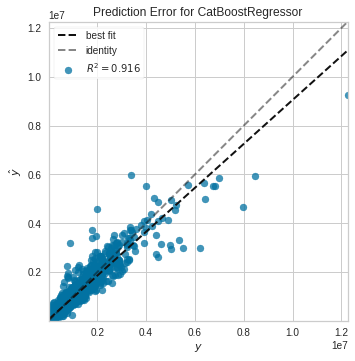

In [ ]:
plot_model(tuned_catboost, plot = 'error')

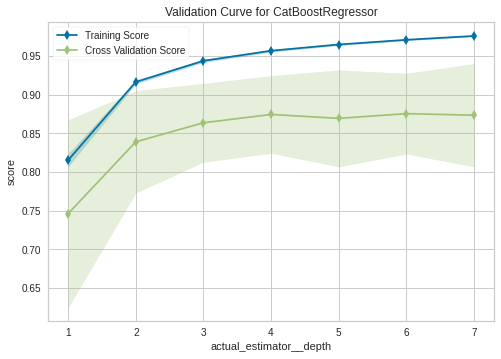

In [ ]:
plot_model(tuned_catboost, plot = 'vc')

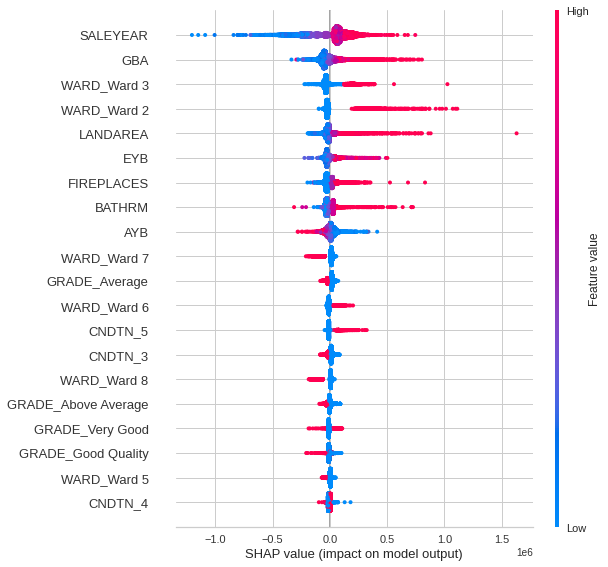

In [ ]:
interpret_model(tuned_catboost)

## Finalize and save the model

After evaluate the results on development data, we will finalize the model by train it using the whole development data and then evaluate it on the testing data to simulate real-world scenario.

In [ ]:
final_model = finalize_model(tuned_catboost)

In [ ]:
save_model(final_model, model_name='catboost_final')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['HEAT', 'STYLE',
                                                             'STRUCT', 'GRADE',
                                                             'EXTWALL', 'ROOF',
                                                             'INTWALL', 'WARD',
                                                             'CNDTN'],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['BATHRM', 'HF_BATHRM',
                                                           'AC', 'BEDRM', 'AYB',
                                                           'EYB', 'GBA',
                                                           'KITCHENS',
                                                           'FIREPLACES',
                      

## Predictions on unseen data

During prediction, we will use prediction interval. Prediction interval is a quantification of the uncertainty on a prediction which provides a probabilistic upper and lower bounds on the estimate of an outcome variable.

In this case, we will use 95% prediction interval which means: *Given a prediction of ‘y’ given ‘x’, there is a 95% likelihood that the range ‘a’ to ‘b’ covers the true outcome*

![](https://machinelearningmastery.com/wp-content/uploads/2018/04/Relationship-between-prediction-actual-value-and-prediction-interval.png)

Source: https://machinelearningmastery.com/prediction-intervals-for-machine-learning/

In [ ]:
from pycaret.regression import load_model
from numpy import sum as arraysum
from numpy import sqrt

saved_catboost = load_model('catboost_final')

Transformation Pipeline and Model Successfully Loaded


A prediction interval is different from a confidence interval. A confidence interval quantifies the uncertainty on an estimated population variable, such as the mean or standard deviation. Whereas a prediction interval quantifies the uncertainty on a single observation estimated from the population.

In [ ]:
data_unseen_features = data_unseen.drop('PRICE', axis=1)
data_unseen_target = data_unseen['PRICE']
predictions = predict_model(saved_catboost, data=data_unseen_features)

In [ ]:
label = predictions['Label']
y = data_unseen_target

We can estimate the standard deviation in the prediction direction using the following formula:

`SE = sqrt(1 / (N - 2) * e(i)^2 for i to N)`

In [ ]:
sum_errs = arraysum((y - label)**2)
stdev = sqrt(1/(len(y)-2) * sum_errs)

We will use the significance level of 95%, which is 1.96 standard deviations.

In [86]:
interval = 1.96 * stdev
print(interval)

405099.98265637766


Once the interval is calculated, we can summarize the bounds on the prediction to the user.

In [ ]:
lower, upper = label - interval, label + interval

## Evaluate Predictions

In [ ]:
predictions

,BATHRM,HF_BATHRM,HEAT,AC,BEDRM,AYB,EYB,GBA,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,LANDAREA,WARD,SALEYEAR,RMDL,Label
0,3,1,Hot Water Rad,1,5,1910.0,1984,2522.0,3 Story,Row Inside,Very Good,5,Common Brick,Built Up,Hardwood,2,4,1680,Ward 2,2016,1,1.985366e+06
1,3,1,Warm Cool,1,3,1908.0,1967,1488.0,2 Story,Row Inside,Above Average,5,Common Brick,Built Up,Hardwood,2,1,1424,Ward 2,2018,1,1.320345e+06
2,3,1,Warm Cool,1,4,1880.0,1967,2552.0,3 Story,Row Inside,Above Average,5,Common Brick,Metal- Sms,Hardwood,2,2,1853,Ward 2,2016,1,1.772831e+06
3,3,1,Forced Air,1,4,1800.0,1967,2382.0,3 Story,Row Inside,Above Average,6,Common Brick,Metal- Sms,Hardwood,2,3,1853,Ward 2,2018,1,1.802183e+06
4,3,2,Forced Air,1,4,1800.0,1967,2520.0,3 Story,Row Inside,Above Average,5,Common Brick,Built Up,Hardwood,2,2,1853,Ward 2,2017,1,1.816992e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10430,1,0,Forced Air,0,2,1950.0,1969,832.0,2 Story,Semi-Detached,Average,4,Common Brick,Comp Shingle,Hardwood,1,0,1528,Ward 8,2018,1,1.972257e+05
10431,2,1,Forced Air,1,2,1941.0,1967,832.0,2 Story,Row Inside,Above Average,5,Common Brick,Slate,Hardwood,1,0,1069,Ward 8,2018,1,3.155537e+05
10432,2,1,Forced Air,1,3,1941.0,1964,912.0,2 Story,Row End,Average,5,Common Brick,Built Up,Hardwood,1,0,1834,Ward 8,2017,1,3.124474e+05
10433,2,1,Forced Air,1,4,1980.0,1992,1200.0,2 Story,Row End,Above Average,4,Vinyl Siding,Comp Shingle,Hardwood,1,0,2220,Ward 8,2018,1,2.812737e+05


First, we will evaluate the number of records that are in our prediction interval. We can see that out of 10435 records, there are 10072 records that are in the interval.

In [ ]:
data_unseen.shape

(10435, 22)

In [ ]:
data_unseen[(data_unseen['PRICE'] > lower) & (data_unseen['PRICE'] < upper)].shape

(10072, 22)

In [ ]:
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Max Error: " + str(max_error(data_unseen_target, predictions["Label"])))
print("Mean Absolute Error: " + str(mean_absolute_error(data_unseen_target, predictions["Label"])))
print("R2 Score: " + str(r2_score(data_unseen_target, predictions["Label"])))
print("Root Mean Squared Error: " + str(mean_squared_error(data_unseen_target, predictions["Label"], squared=False)))

Max Error: 4317048.048713048
Mean Absolute Error: 118480.25420924411
R2 Score: 0.8828806106182477
Root Mean Squared Error: 206663.85689957015
